# Planar Brownian motion & loop erased random walk





First, load some packages:

In [0]:
!pip install sdeint
import numpy                as np
import numexpr              as ne
import sdeint    # for solving stochastic differential equations numerically           
import matplotlib.pylab as plt

# 2D Brownian motion, reflected 2D Brownian motion

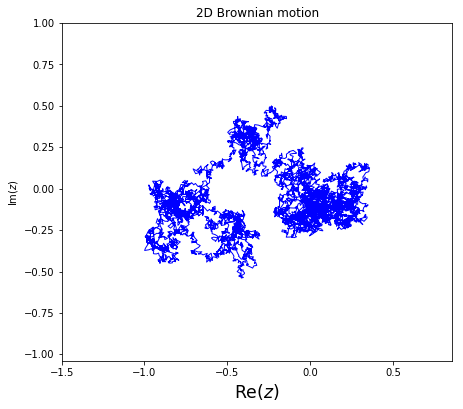

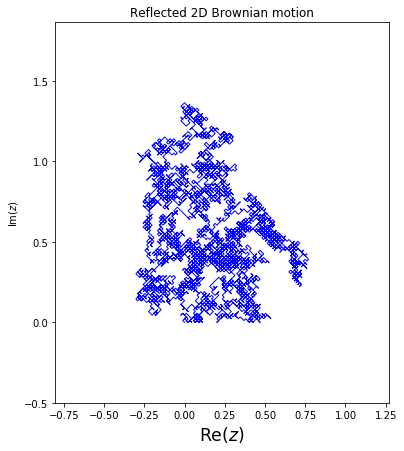

In [0]:
N = 8000
brownian2D = np.empty(N, np.complex128)
brownian2D[0] = 0
for j in range(1,N):
    brownian2D[j] = brownian2D[j-1] + np.random.normal(0,1/np.sqrt(N)) + np.random.normal(0,1/np.sqrt(N))*1j
min_re = min(brownian2D.real)
min_im = min(brownian2D.imag)
max_re = max(brownian2D.real)
max_im = max(brownian2D.imag)   
plt.figure(figsize=(7,7))   
plt.plot(brownian2D.real, brownian2D.imag, lw=1, color=[0,0,1])

plt.ylim(min_im-0.5, max_im+0.5)
plt.xlim(min_re-0.5, max_re+0.5)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_title('2D Brownian motion')
ax.set_xlabel('Re$(z)$', fontsize='xx-large')
ax.set_ylabel('Im$(z)$')
#ax.fill_between(result2.real, result2.imag, color=col[:,0])
ax.set_alpha(0.0)
plt.show()

N = 8000
brownian2D = np.empty(N, np.complex128)
brownian2D[0] = 0
for j in range(1,N):
    #brownian2D[j] = brownian2D[j-1] + np.random.normal(0,1/np.sqrt(N)) + np.random.normal(0,1/np.sqrt(N))*1j
    if np.random.randint(low=0, high=2) == 0:
        delta = -1
    else:
        delta = +1
    brownian2D[j] = brownian2D[j-1] + delta
    if np.random.randint(low=0, high=2) == 0:
        delta = -1
    else:
        delta = +1
    brownian2D[j] = brownian2D[j] + delta*1j
    if brownian2D[j].imag < 0:
        brownian2D[j] = brownian2D[j].real - brownian2D[j].imag * 1j
        
brownian2D = brownian2D / np.sqrt(N)      
        
        
min_re = min(brownian2D.real)
min_im = min(brownian2D.imag)
max_re = max(brownian2D.real)
max_im = max(brownian2D.imag) 

plt.figure(figsize=(7,7))   
plt.plot(brownian2D.real, brownian2D.imag, lw=1, color=[0,0,1])

plt.ylim(min_im-0.5, max_im+0.5)
plt.xlim(min_re-0.5, max_re+0.5)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_title('Reflected 2D Brownian motion')
ax.set_xlabel('Re$(z)$', fontsize='xx-large')
ax.set_ylabel('Im$(z)$')
#ax.fill_between(result2.real, result2.imag, color=col[:,0])
ax.set_alpha(0.0)
plt.show()

# Loop erased random walk (LERW)

<Figure size 504x504 with 0 Axes>

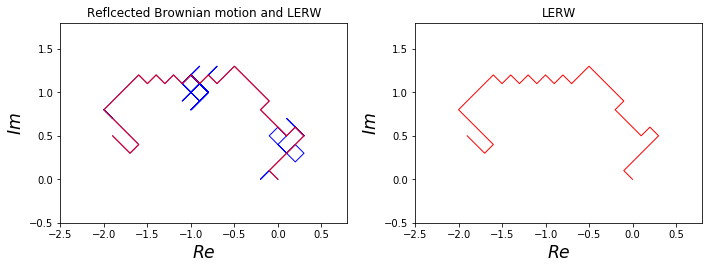

<Figure size 504x504 with 0 Axes>

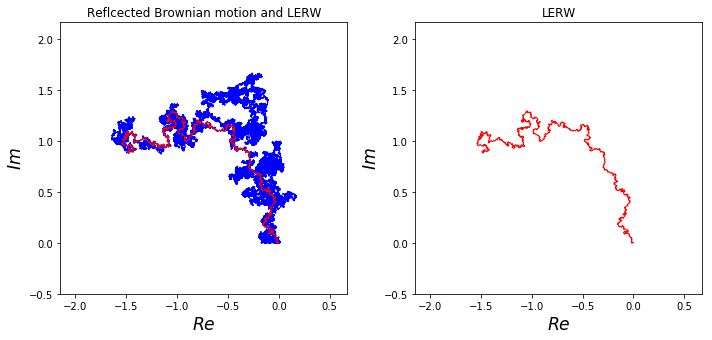

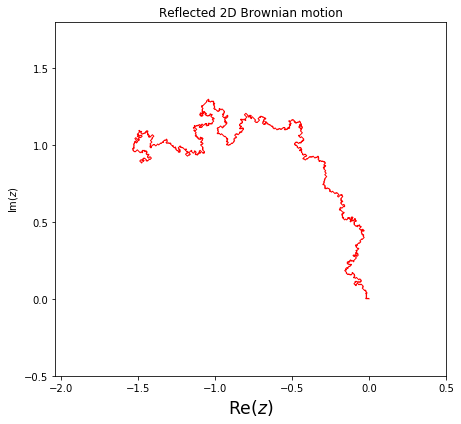

In [0]:
N = 100
brownian2D = np.empty(N, np.complex128)
brownian_simple = []
brownian2D[0] = 0

for j in range(1,N):
    #brownian2D[j] = brownian2D[j-1] + np.random.normal(0,1/np.sqrt(N)) + np.random.normal(0,1/np.sqrt(N))*1j
    if np.random.randint(low=0, high=2) == 0:
        delta = -1
    else:
        delta = +1
    brownian2D[j] = brownian2D[j-1] + delta
    if np.random.randint(low=0, high=2) == 0:
        delta = -1
    else:
        delta = +1
    brownian2D[j] = brownian2D[j] + delta*1j
    if brownian2D[j].imag < 0:
        brownian2D[j] = brownian2D[j].real - brownian2D[j].imag * 1j

for j in range(len(brownian2D)):
    append = True
    index_end = 0
    for k in range(len(brownian_simple)):
        if brownian2D[j] == brownian_simple[k]:
            append = False
            brownian_simple = brownian_simple[0:k+1]
            break
    if append:
        brownian_simple.append(brownian2D[j])

brownian2D = brownian2D / np.sqrt(N)   
brownian_simple = brownian_simple / np.sqrt(N)   
        
min_re = min(brownian2D.real)
min_im = min(brownian2D.imag)
max_re = max(brownian2D.real)
max_im = max(brownian2D.imag) 
brownian_simple = np.array(brownian_simple)

plt.figure(figsize=(7,7)) 

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title('Reflcected Brownian motion and LERW')
axs[0].set_xlim([min_re-0.5, max_re+0.5])
axs[0].set_ylim([min_im-0.5, max_im+0.5])
axs[0].set_aspect('equal')
axs[0].plot(brownian2D.real, brownian2D.imag, lw=1, color=[0,0,1])
axs[0].plot(brownian_simple.real, brownian_simple.imag, lw=1, color=[1,0,0])
axs[1].set_title('LERW')
axs[1].set_xlim([min_re-0.5, max_re+0.5])
axs[1].set_ylim([min_im-0.5, max_im+0.5])
axs[1].plot(brownian_simple.real, brownian_simple.imag, lw=1, color=[1,0,0])
axs[0].set_xlabel('$Re$', fontsize='xx-large')
axs[0].set_ylabel('$Im$', fontsize='xx-large')
axs[1].set_aspect('equal')
axs[1].set_xlabel('$Re$', fontsize='xx-large')
axs[1].set_ylabel('$Im$', fontsize='xx-large')
fig.tight_layout()
plt.show()



N = 100000
brownian2D = np.empty(N, np.complex128)
brownian_simple = []
brownian2D[0] = 0

for j in range(1,N):
    #brownian2D[j] = brownian2D[j-1] + np.random.normal(0,1/np.sqrt(N)) + np.random.normal(0,1/np.sqrt(N))*1j
    if np.random.randint(low=0, high=2) == 0:
        delta = -1
    else:
        delta = +1
    brownian2D[j] = brownian2D[j-1] + delta
    if np.random.randint(low=0, high=2) == 0:
        delta = -1
    else:
        delta = +1
    brownian2D[j] = brownian2D[j] + delta*1j
    if brownian2D[j].imag < 0:
        brownian2D[j] = brownian2D[j].real - brownian2D[j].imag * 1j

for j in range(len(brownian2D)):
    append = True
    index_end = 0
    for k in range(len(brownian_simple)):
        if brownian2D[j] == brownian_simple[k]:
            append = False
            brownian_simple = brownian_simple[0:k+1]
            break
    if append:
        brownian_simple.append(brownian2D[j])

brownian2D = brownian2D / np.sqrt(N)   
brownian_simple = brownian_simple / np.sqrt(N)   
        
min_re = min(brownian2D.real)
min_im = min(brownian2D.imag)
max_re = max(brownian2D.real)
max_im = max(brownian2D.imag) 
brownian_simple = np.array(brownian_simple)

plt.figure(figsize=(7,7)) 

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title('Reflcected Brownian motion and LERW')
axs[0].set_xlim([min_re-0.5, max_re+0.5])
axs[0].set_ylim([min_im-0.5, max_im+0.5])
axs[0].set_aspect('equal')
axs[0].plot(brownian2D.real, brownian2D.imag, lw=1, color=[0,0,1])
axs[0].plot(brownian_simple.real, brownian_simple.imag, lw=1, color=[1,0,0])
axs[1].set_title('LERW')
axs[1].set_xlim([min_re-0.5, max_re+0.5])
axs[1].set_ylim([min_im-0.5, max_im+0.5])
axs[1].plot(brownian_simple.real, brownian_simple.imag, lw=1, color=[1,0,0])
axs[0].set_xlabel('$Re$', fontsize='xx-large')
axs[0].set_ylabel('$Im$', fontsize='xx-large')
axs[1].set_aspect('equal')
axs[1].set_xlabel('$Re$', fontsize='xx-large')
axs[1].set_ylabel('$Im$', fontsize='xx-large')
fig.tight_layout()
plt.show()


min_re = min(brownian_simple.real)
min_im = min(brownian_simple.imag)
max_re = max(brownian_simple.real)
max_im = max(brownian_simple.imag) 

plt.figure(figsize=(7,7))   
plt.plot(brownian_simple.real, brownian_simple.imag, lw=1, color=[1,0,0])

plt.ylim(min_im-0.5, max_im+0.5)
plt.xlim(min_re-0.5, max_re+0.5)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_title('Reflected 2D Brownian motion')
ax.set_xlabel('Re$(z)$', fontsize='xx-large')
ax.set_ylabel('Im$(z)$')
#ax.fill_between(result2.real, result2.imag, color=col[:,0])
ax.set_alpha(0.0)
plt.show()

# Scaling limit of LERW = SLE(2)

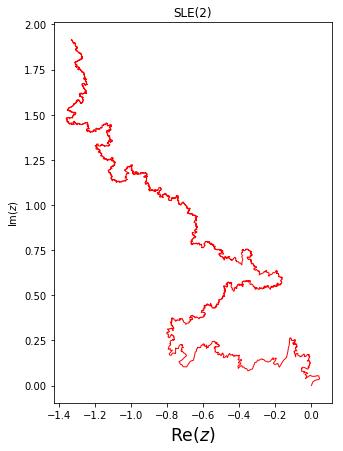

In [0]:
def multiple_sle_driving_functions(kappa, Nslits, x0, tspan, lambdas):
    diag = np.sqrt([kappa * x for x in lambdas])
    B = np.diag(diag) # diagonal, so independent Brownian motions
    def f(x, t):
        res = np.zeros(Nslits, dtype=np.float_)
        for k in range(0, Nslits, 1):
            for m in range(0, Nslits, 1):
                if k != m:
                    res[k] = res[k] + 2*(lambdas[k]+lambdas[m])/(x[k]-x[m])
        return np.array(res)

    def G(x, t):
        return B

    result = sdeint.itoint(f, G, x0, tspan)
    result = np.transpose(result)
    
    return result
  
def vslit_zip(z, dt, u):
    return ne.evaluate("1j * sqrt(4 * dt - (z-u) ** 2) + u")
  
  
def multiple_slits(t, lambdas, u) :
    nsteps = len(t)
    nslits = u.shape[0]
    z = np.empty([nslits,nsteps], dtype=np.complex)    
    for m in range(0, nslits, 1):
        for j in range(0, nsteps, 1):
            z[m][j] =  u[m][j]+0.000001j
    for step in range(nsteps-1, 0, -1):
        dt = (t[step] - t[step-1])            
        for slit1 in range(0, nslits, 1): 
            for slit2 in range(0, nslits, 1): 
                z[slit2][step:] = vslit_zip(z[slit2][step:], dt*lambdas[slit1], u[slit1][step])
    return z


Nslits = 1
end_time = 1
x0 = np.array([0.0])
N = 10000
tspan = np.linspace(0.0, end_time, N)
lambdas = np.zeros(Nslits, dtype=np.float_) + 1/Nslits
kappa = 2 # kappa=2 corresponds to LEWR
u = multiple_sle_driving_functions(kappa, Nslits, x0, tspan, lambdas)

z = multiple_slits(tspan, lambdas, u)  # returns a complex ndarray
plt.figure(figsize=(7,7))  
plt.plot(z[0,:].real, z[0,:].imag, lw=1,  color=[1,0,0])
ax = plt.gca()
ax.set_aspect('equal')
ax.set_title('SLE(2)')
ax.set_xlabel('Re$(z)$', fontsize='xx-large')
ax.set_ylabel('Im$(z)$')
ax.set_alpha(0.0)
